# Ejemplo de Algortimos de Inducción para generar reglas para clasificar


In [1]:
#@title Librerías a usar
import ipywidgets as widgets
from ipywidgets import Box, Layout
from IPython.display import clear_output

import os
import csv

from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

from sklearn import tree

from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print("Librerías cargadas")

Librerías cargadas


In [7]:
#@title Subir datos


from google.colab import files

# sube archivo
uploaded = files.upload()


Saving naves.csv to naves.csv


In [8]:

#@title Cargar datos


#@markdown ### Configuración del archivo CSV:
delimitador_columnas = ',' #@param {type:"string"}

## selección de los parámetros

def cargarNombreClases(path, archivo_datos):
    return "", ""


# función auxiliara para que no ejecute UI cada vez
def hacerNada():
  return

# se define esta función para que se ocupe de aplicar la configuración
def on_buttonAplicar_clicked(b):
  print("")
  funcionCambiaSeleccion_ConfigDatos(combo_att_clase.value, texto_nomClases.value, combo_att_entrada.value)

# aplica configuración de datos
def funcionCambiaSeleccion_ConfigDatos(attClase, nomClases, att_entrada):
  global Y, X, nombre_clases, atributos_entrada, ClassAttributeName

  if (attClase is None) or (attClase =="") or\
    (att_entrada is None) or (att_entrada ==""):
    return

  # si el atributo clase está como de entrada, lo saca (no tiene sentido)
  att_entrada = list(att_entrada)
  if attClase in att_entrada:
    print("Eliminando atributo " + attClase + " como de entrada dado que es clase.")
    att_entrada.remove( attClase )

  if (att_entrada == "") or (len(att_entrada)==0):
    print("No se han definido atributos de entrada!")
    return

  # guarda configuración
  nombre_clases = nomClases

    # genera los datos solo con los atributos seleccionados
  Y = np.array(df[attClase])
  X = np.array(df[att_entrada])

  # muestra resultados
  print("\n> Atributos entrada: ", att_entrada)
  print("\t X: ", X.shape)

  if (nombre_clases is None) or (nombre_clases==""):
    print("\n> Atributo clase: ", attClase)
  else:
    print("\n> Atributo clase: ", attClase, " [", nombre_clases, "]")
  print("\t Y: ", Y.shape)

  # guarda para usar luego
  atributos_entrada = att_entrada
  ClassAttributeName = attClase

## aplicación de los parámetros elegidos

# configura para que muestre todas las columnas y filas
pd.options.display.max_rows = 100
pd.options.display.max_columns = 100


for archivo_datos in uploaded.keys():
  # Carga los datos del CSV y muestra los primeros
  df = pd.read_csv(archivo_datos,  sep=delimitador_columnas, engine="python")
  print("Archivo de datos ", archivo_datos, " cargado")
  break

print("\n> Cabecera: ")
print(df.head())
print("\n> Características: ")
print(df.describe())
print("\n")

# inicializa valores
X = None
Y = None
atributos_entrada = []
ClassAttributeName = ""

# intenta cargar configuración asociada a los datos
# trata de obtener la configuración del archivo asociado
atributo_clase, nombre_clases = cargarNombreClases("", archivo_datos)

# muestra interface para cargar configuración

# auxiliar para que muestre bien la descripción
style_3D = {'description_width': 'initial'}

tit = widgets.Label("Ajuste para configuración de los Datos: ")

# prepara combo para determinar atributo clase
selecc_atributos = [ ]
selecc_atributos.extend( df.columns.values.tolist() )
if (atributo_clase is None) or (atributo_clase=="") or (atributo_clase not in selecc_atributos):
  att_selecc_defecto = len(selecc_atributos)-1
else:
  att_selecc_defecto = selecc_atributos.index(atributo_clase)
combo_att_clase = widgets.Dropdown(
    options = selecc_atributos,
    value = selecc_atributos[att_selecc_defecto], # mostrar por defecto de config
    description = 'Atributo clase:',
    style=style_3D,
    disabled = False,
)
# prepara campo para ingresar nombre clases (toma por defecto de config)
texto_nomClases = widgets.Text(
    value=nombre_clases,
    placeholder='Ingrese nombre clases (si corresponde) separados por comas',
    description='Nombre clases:',
    style=style_3D,
    disabled=False
)

combo_att_entrada = widgets.SelectMultiple(
    options=selecc_atributos,
    value=selecc_atributos,
    #rows=10,
    description='Atributos de entrada:',
    style=style_3D,
    disabled=False
)

# prepara botón y grilla con objetos
btnAplicar = widgets.Button(
    description='Aplicar'
)
configDatos_ui = widgets.GridBox(
      children=[tit, combo_att_clase, texto_nomClases, combo_att_entrada, btnAplicar],
      layout=Layout(width='100%')  )
btnAplicar.on_click(on_buttonAplicar_clicked)

#clear_output()
out_config = widgets.interactive_output(hacerNada, {})
display(configDatos_ui)

# ejecuta para que muestre
on_buttonAplicar_clicked(btnAplicar)


Archivo de datos  naves.csv  cargado

> Cabecera: 
            Ship Type  Manufacturer  Length  Crew  Troops  Cargo Capacity  \
0        Patrol Craft          18.0     4.0   2.0     1.0        200000.0   
1        TIE Fighters          17.0     7.0   2.0     0.0           150.0   
2       Landing Craft          14.0     3.0   4.0     4.0         50000.0   
3  Other Starfighters           1.0     5.0   1.0     0.0            50.0   
4        Medium Ships           2.0     1.0   3.0     1.0       3000000.0   

   Consumables  Hyperdrive Multiplier  Hyperdrive Backup  Speed  Hull  \
0     3.000000                    1.0                1.0    7.0   8.0   
1     0.166667                    4.0               -1.0    9.0   1.0   
2     1.000000                    1.0                1.0    7.0   2.0   
3     0.222222                   -1.0               -1.0    1.0   7.0   
4    12.000000                    2.0               -1.0    2.0   1.0   

   Shields   Weapons  Special Features  Onboard

GridBox(children=(Label(value='Ajuste para configuración de los Datos: '), Dropdown(description='Atributo clas…


Eliminando atributo Onboard Craft como de entrada dado que es clase.

> Atributos entrada:  ['Ship Type', 'Manufacturer', 'Length', 'Crew', 'Troops', 'Cargo Capacity', 'Consumables', 'Hyperdrive Multiplier', 'Hyperdrive Backup', 'Speed', 'Hull', 'Shields', 'Weapons', 'Special Features']
	 X:  (107, 14)

> Atributo clase:  Onboard Craft
	 Y:  (107,)

Eliminando atributo Ship Type como de entrada dado que es clase.

> Atributos entrada:  ['Manufacturer', 'Length', 'Crew', 'Troops', 'Cargo Capacity', 'Consumables', 'Hyperdrive Multiplier', 'Hyperdrive Backup', 'Speed', 'Hull', 'Shields', 'Weapons', 'Special Features', 'Onboard Craft']
	 X:  (107, 14)

> Atributo clase:  Ship Type
	 Y:  (107,)


In [9]:
#@title Preparar datos

#@markdown Para algoritmos de inducción siempre el atributo clase debe ser considerado como Discreto
considerar_atributo_clase = "discreto - CLASIFICACION" #@param ["discreto - CLASIFICACION"]  ## , "continuo - ESTIMACION"

#@markdown Porcentaje de datos para usar en el entrenamiento:
proporcion_porcentaje_datos_entrenamiento =   80#@param {type:"integer"}

print("> se considera problema de CLASIFICACIÓN \n")

CLASES = []
# define nombre de clases
if (nombre_clases == "") or (nombre_clases == "-"):
    # toma los valores de clase orginales del archivo
    if str(Y[0]).replace(".","").isnumeric():
        # Y son numeros
        for val in range(int(np.max(Y))+1):
          CLASES.append( "clase {:>3}".format(val) )
        # para algoritmos de inducción la salida debe ser discreta
        # asi que se define lista auxiliar ya con nombre de clases
        Ydisc = [ CLASES[y] for y in Y ]
    else:
        # Y no son números
        CLASES = list(set(Y))
        CLASES.sort()
        # ya son discretos
        Ydisc = Y
else:
    # toma configuración de nombre de clases
    for val in nombre_clases.split(','):
      CLASES.append( val )
    # para algoritmos de inducción la salida debe ser discreta
    # asi que se define lista auxiliar ya con nombre de clases
    Ydisc = [ CLASES[y] for y in Y ]

# determina la proporción a usar para entrenar y probar
if proporcion_porcentaje_datos_entrenamiento>100:
  propTrain = 1
elif proporcion_porcentaje_datos_entrenamiento<1:
  propTrain = 0.1
else:
  propTrain = proporcion_porcentaje_datos_entrenamiento/100

# separa al azar usando muestreo con proporción indicada
# intenta hacer muestreo estatificado
try:
  x_train, x_test, y_train, y_test = train_test_split(X, Ydisc, test_size=(1-propTrain), stratify=Y)
except ValueError:
  print("-- No se puede aplicar Muestreo Estratificado! -> se usa Muestreo Simple \n")
  # hace muestreo simple
  x_train, x_test, y_train, y_test = train_test_split(X, Ydisc, test_size=(1-propTrain))

print("\n> Para Entrenamiento: ")
print(" - x_train (cant ejemplos, datos entrada): ", x_train.shape)
print(" - y_train (cant): ", len(y_train))
for cl in CLASES:
  cant = 0
  for y in y_train:
    if cl == y: cant = cant + 1
  print("    ", cl, ":", cant)

print("\n Para Prueba: ")
print(" - x_test (cant ejemplos, datos entrada): ", x_test.shape)
print(" - y_test (cant): ", len(y_test))
for cl in CLASES:
  cant = 0
  for y in y_test:
    if cl == y: cant = cant + 1
  print("    ", cl, ":", cant)




> se considera problema de CLASIFICACIÓN 


> Para Entrenamiento: 
 - x_train (cant ejemplos, datos entrada):  (85, 14)
 - y_train (cant):  85
     Command Ships : 2
     Heavy Ships : 11
     Landing Craft : 6
     Medium Ships : 12
     Other Starfighters : 8
     Patrol Craft : 5
     Shuttles : 5
     TIE Bombers : 5
     TIE Experimental Craft : 4
     TIE Fighters : 16
     TIE Support Craft : 8
     Transporters : 3

 Para Prueba: 
 - x_test (cant ejemplos, datos entrada):  (22, 14)
 - y_test (cant):  22
     Command Ships : 1
     Heavy Ships : 3
     Landing Craft : 1
     Medium Ships : 3
     Other Starfighters : 2
     Patrol Craft : 2
     Shuttles : 1
     TIE Bombers : 1
     TIE Experimental Craft : 1
     TIE Fighters : 4
     TIE Support Craft : 2
     Transporters : 1


In [10]:
#@title Aplicar Algoritmo de Inducción

# parámetros

param_criterio = "Entropy" #@param ["Entropy", "Error", "Gini impurity"]
if param_criterio == "Entropy":
  pCriteria = "entropy"
elif param_criterio == "Error":
  pCriteria = "log_loss"
#elif param_criterio == "Gini impurity":
else:
  pCriteria = "gini"
param_max_depth = 0 #@param {type:"number"}
if param_max_depth < 1:
    # menor que 1 es opcional
    param_max_depth = None
param_split_strategy = "Best" #@param ["Best", "Random"]
if param_split_strategy== "Best":
  pSpliter = "best"
#elif param_split_strategy == "Random":
else:
  pSpliter = "random"
param_min_samples_split  = 0 #@param {type:"number"}
if param_min_samples_split  < 2:
    param_min_samples_split  = 2
param_min_samples_leaf  = 1 #@param {type:"number"}
if param_min_samples_leaf  < 1:
    param_min_samples_leaf  = 1
param_max_leaf_nodes = 0 #@param {type:"number"}
if param_max_leaf_nodes < 2:
    param_max_leaf_nodes = None

# genera el árbol y lo muestra
clf = tree.DecisionTreeClassifier(criterion=pCriteria,
                                  splitter=pSpliter,
                                  max_depth=param_max_depth,
                                  min_samples_split=param_min_samples_split,
                                  min_samples_leaf=param_min_samples_leaf,
                                  max_leaf_nodes=param_max_leaf_nodes)
clf = clf.fit(x_train, y_train)

# muestra las reglas
r = tree.export_text(clf, feature_names= list(atributos_entrada))

print("> Reglas:" )
print(r)




> Reglas:
|--- Cargo Capacity <= 18500.00
|   |--- Troops <= 0.50
|   |   |--- Manufacturer <= 11.00
|   |   |   |--- class: Other Starfighters
|   |   |--- Manufacturer >  11.00
|   |   |   |--- Manufacturer <= 18.50
|   |   |   |   |--- Weapons <= 1.07
|   |   |   |   |   |--- Hull <= 5.50
|   |   |   |   |   |   |--- class: TIE Fighters
|   |   |   |   |   |--- Hull >  5.50
|   |   |   |   |   |   |--- Speed <= 8.50
|   |   |   |   |   |   |   |--- Cargo Capacity <= 55.00
|   |   |   |   |   |   |   |   |--- class: TIE Fighters
|   |   |   |   |   |   |   |--- Cargo Capacity >  55.00
|   |   |   |   |   |   |   |   |--- class: TIE Support Craft
|   |   |   |   |   |   |--- Speed >  8.50
|   |   |   |   |   |   |   |--- class: TIE Fighters
|   |   |   |   |--- Weapons >  1.07
|   |   |   |   |   |--- Cargo Capacity <= 55.00
|   |   |   |   |   |   |--- class: TIE Fighters
|   |   |   |   |   |--- Cargo Capacity >  55.00
|   |   |   |   |   |   |--- class: TIE Bombers
|   |   |   |---

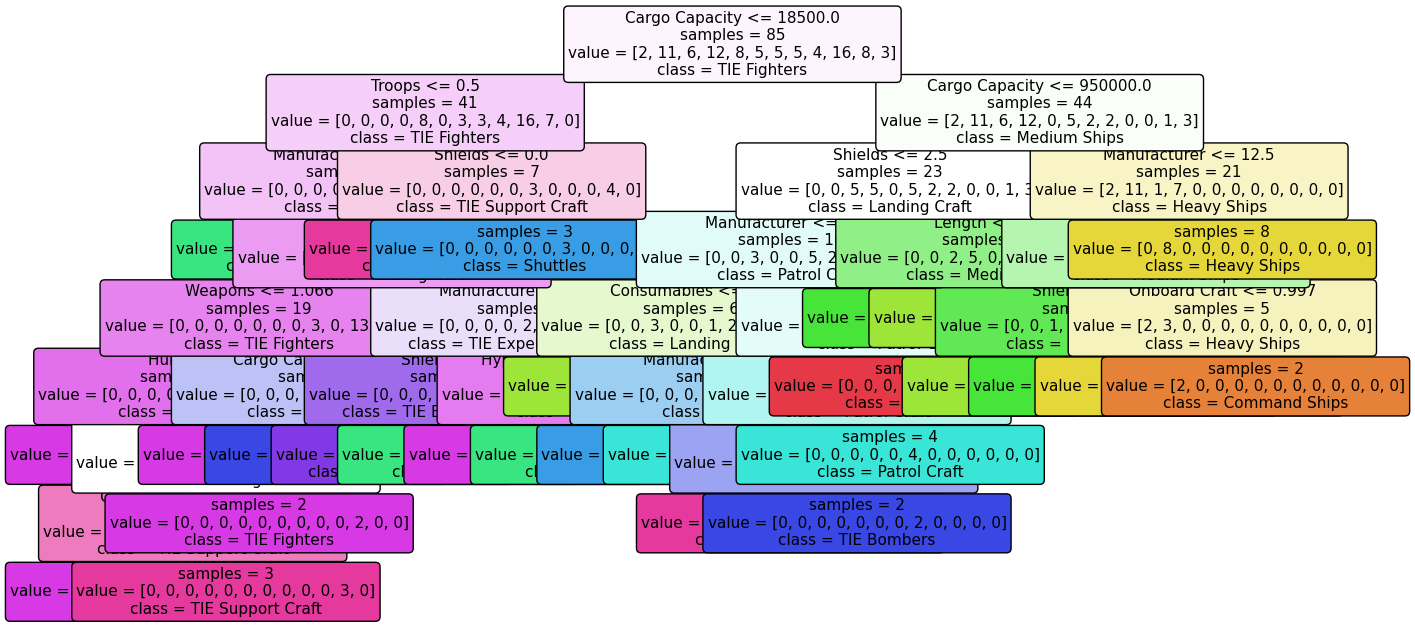

In [11]:
#@title Mostrar Árbol de Decisión


# muestra el árbol
plt.figure(figsize=(15,8))
tree.plot_tree(clf,
              feature_names=atributos_entrada,
              class_names=np.unique(y_train),
              impurity=False,
              rounded=True,
              filled=True,
              fontsize=11)
plt.show()


*** Resultados con datos de Entrenamiento: 

 Reporte de Clasificación: 
                        precision    recall  f1-score   support

         Command Ships       1.00      1.00      1.00         2
           Heavy Ships       1.00      1.00      1.00        11
         Landing Craft       1.00      1.00      1.00         6
          Medium Ships       1.00      1.00      1.00        12
    Other Starfighters       1.00      1.00      1.00         8
          Patrol Craft       1.00      1.00      1.00         5
              Shuttles       1.00      1.00      1.00         5
           TIE Bombers       1.00      1.00      1.00         5
TIE Experimental Craft       1.00      1.00      1.00         4
          TIE Fighters       1.00      1.00      1.00        16
     TIE Support Craft       1.00      1.00      1.00         8
          Transporters       1.00      1.00      1.00         3

              accuracy                           1.00        85
             macro avg       

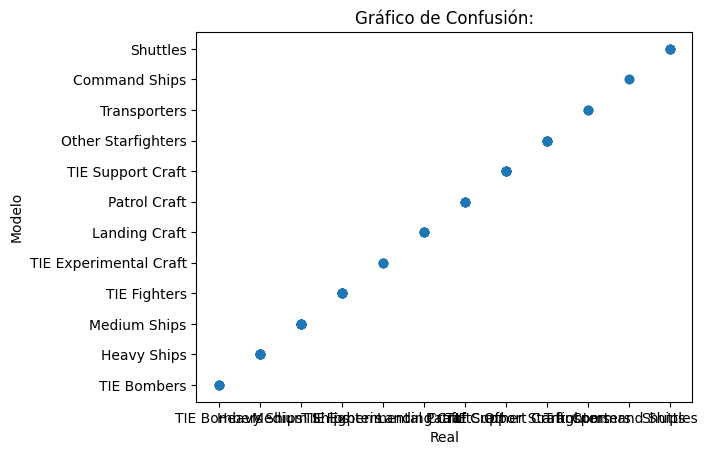

In [12]:
#@title Evaluar modelo con datos de entrenamiento
mostrar_detalle_entrenamiento = False #@param {type:"boolean"}

# función auxiliar para probar el modelo entrenado en detalle
def probarModelo(x, y, clases_map, mostrarDetalle=False):

    # procesa las imágenes de prueba con el modelo
    predClass = clf.predict(x)

    # muestra los resultados con las imágenes
    classPreds = []
    classReal = []
    for i in range(len(x)):

        # prepara salida
        clReal = y[i]
        clPred = predClass[i]

        classReal.append( clReal )
        classPreds.append( clPred )

        strTitulo = 'Real: ' + clReal + ' / Modelo(Árbol): '
        strTitulo = strTitulo + clPred
        strTitulo = strTitulo + ": " + ("ok" if (clPred==clReal) else "error!")

        # muestra comparación con la imagen
        if mostrarDetalle:
          print(strTitulo)

    # muestra reporte de clasificación
    print("\n Reporte de Clasificación: ")
    print(classification_report(classReal, classPreds))

    # muestra matriz de confusion
    print('\nMatriz de Confusión ( real / modelo ): ')
    cm = confusion_matrix(classReal, classPreds, labels=clases_map)
    cmtx = pd.DataFrame(
        cm,
        index=['r:{:}'.format(x) for x in clases_map],
        columns=['m:{:}'.format(x) for x in clases_map]
      )
    # agrega para poder mostrar la matrix de confusión completa
    pd.options.display.max_rows = 100
    pd.options.display.max_columns = 100
    cmtx.sort_index(axis=0, inplace=True)
    cmtx.sort_index(axis=1, inplace=True)
    print(cmtx)
    print("\n")

    # gráfico de comparación
    plt.title('Gráfico de Confusión:')
    plt.xlabel('Real')
    plt.ylabel('Modelo')
    plt.scatter(classReal, classPreds)

# prueba con los datos de entrenamiento
print("*** Resultados con datos de Entrenamiento: ")
probarModelo(x_train, y_train, CLASES, mostrar_detalle_entrenamiento)




*** Resultados con datos de Prueba: 

 Reporte de Clasificación: 
                        precision    recall  f1-score   support

         Command Ships       0.00      0.00      0.00         1
           Heavy Ships       0.50      0.33      0.40         3
         Landing Craft       0.00      0.00      0.00         1
          Medium Ships       0.75      1.00      0.86         3
    Other Starfighters       0.50      1.00      0.67         2
          Patrol Craft       0.50      0.50      0.50         2
              Shuttles       0.00      0.00      0.00         1
           TIE Bombers       0.50      1.00      0.67         1
TIE Experimental Craft       1.00      1.00      1.00         1
          TIE Fighters       1.00      0.50      0.67         4
     TIE Support Craft       0.33      0.50      0.40         2
          Transporters       0.00      0.00      0.00         1

              accuracy                           0.55        22
             macro avg       0.42 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


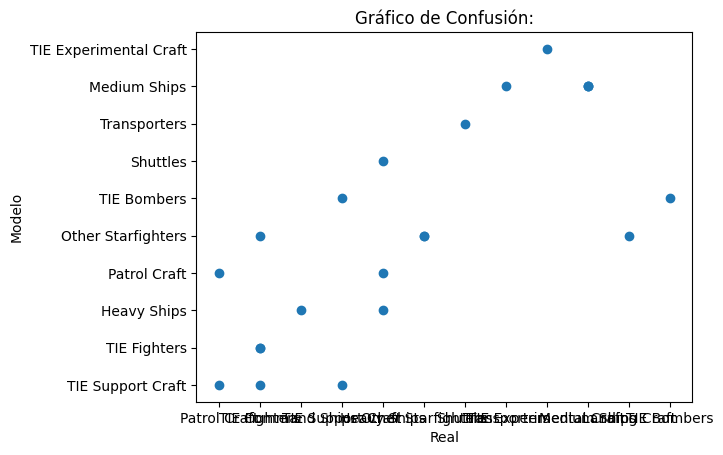

In [13]:
 #@title Evaluar modelo con datos de prueba
 # evalua al modelo entrenado
mostrar_detalle_prueba = False #@param {type:"boolean"}

# prueba con los datos de prueba
print("\n\n*** Resultados con datos de Prueba: ")
probarModelo(x_test, y_test, CLASES, mostrar_detalle_prueba)